In [2]:
import numpy as np
import pandas as pd

In [3]:
delivery=pd.read_csv("IPL_Ball_by_Ball_2008_2022.csv")

In [4]:
delivery.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [5]:
match=pd.read_csv("IPL_Matches_2008_2022.csv")

In [6]:
match.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [7]:
delivery.shape

(225954, 17)

In [8]:
match.shape

(950, 20)

In [9]:
#getting the total runs of each innings of all the matches. Note reset_index() is used to convert it into a dataframe

total_score_df=delivery.groupby(['ID','innings']).sum()['total_run'].reset_index()
total_score_df

,ID,innings,total_run
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
1923,1312198,2,193
1924,1312199,1,157
1925,1312199,2,161
1926,1312200,1,130


In [10]:
#Let us remove the 1st innings score
total_score_df=total_score_df[total_score_df['innings']==1]
total_score_df

,ID,innings,total_run
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
1918,1304116,1,157
1920,1312197,1,188
1922,1312198,1,207
1924,1312199,1,157


In [11]:
#Now we will merge the above dataframe with the matches dataset

match_df=match.merge(total_score_df[['ID', 'total_run']], left_on='ID', right_on='ID')
match_df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,total_run
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,130
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,157
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,207
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,188
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,...,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan,110
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,...,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper,165
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,...,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar,129
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,...,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri,240


In [12]:
match_df['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [13]:
#Renaming the old team names with the current one
match_df['Team1']=match_df['Team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['Team2']=match_df['Team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['Team1']=match_df['Team1'].str.replace('Deccan Charges','Sunrisers Hyderabad')
match_df['Team2']=match_df['Team2'].str.replace('Deccan Charges','Sunrisers Hyderabad')

match_df['Team1']=match_df['Team1'].str.replace('Punjab Kings','Kings XI Punjab')
match_df['Team2']=match_df['Team2'].str.replace('Punjab Kings','Kings XI Punjab')

In [14]:
#Now let us remove the teams which are not currently playing in the tournament
teams=[
    'Rajasthan Royals', 
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad', 
    'Delhi Capitals', 
    'Chennai Super Kings',
    'Gujarat Titans', 
    'Lucknow Super Giants', 
    'Kolkata Knight Riders', 
    'Mumbai Indians', 
    'Kings XI Punjab',
]
match_df=match_df[match_df['Team1'].isin(teams)]
match_df=match_df[match_df['Team2'].isin(teams)]

In [15]:
match_df.shape

(765, 21)

In [16]:
#Removing the matches in which D/L method is applied
match_df = match_df[match_df['method'] != 'D/L']

In [17]:
match_df=match_df[['ID','City','WinningTeam','total_run','Team1','Team2']]
match_df

,ID,City,WinningTeam,total_run,Team1,Team2
0,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans
1,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals
2,1312198,Kolkata,Royal Challengers Bangalore,207,Royal Challengers Bangalore,Lucknow Super Giants
3,1312197,Kolkata,Gujarat Titans,188,Rajasthan Royals,Gujarat Titans
4,1304116,Mumbai,Punjab Kings,157,Sunrisers Hyderabad,Kings XI Punjab
...,...,...,...,...,...,...
944,335987,Jaipur,Rajasthan Royals,166,Rajasthan Royals,Kings XI Punjab
946,335985,Mumbai,Royal Challengers Bangalore,165,Mumbai Indians,Royal Challengers Bangalore
947,335984,Delhi,Delhi Daredevils,129,Delhi Capitals,Rajasthan Royals
948,335983,Chandigarh,Chennai Super Kings,240,Kings XI Punjab,Chennai Super Kings


In [18]:
delivery_df=match_df.merge(delivery,on='ID')
delivery_df

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,extra_type,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,1,0,1,YBK Jaiswal,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,1,0,2,YBK Jaiswal,...,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,1,0,3,JC Buttler,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,1,0,4,YBK Jaiswal,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,1,0,5,YBK Jaiswal,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179575,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
179576,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
179577,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
179578,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [19]:
#We will be predicting the winner based on second innings, so there is no use of first innings delivery details
delivery_df=delivery_df[delivery_df['innings']==2]
delivery_df.shape

(86862, 22)

In [20]:
#Let us create a column named 'current_score' which will be storing current_score after every ball. Note cumsum is cumulutative summation
delivery_df.loc[:, 'current_score'] = delivery_df.groupby('ID')['total_run_y'].cumsum()
delivery_df

C:\Users\avane\AppData\Local\Temp\ipykernel_32092\3873718862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df.loc[:, 'current_score'] = delivery_df.groupby('ID')['total_run_y'].cumsum()


,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score
120,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0
121,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0
122,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1
123,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1
124,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179575,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,80
179576,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81
179577,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81
179578,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,82


In [21]:
#Let us calculate the runs left
delivery_df.loc[:, 'runs_left'] = delivery_df['total_run_x'] - delivery_df['current_score'] + 1
delivery_df

C:\Users\avane\AppData\Local\Temp\ipykernel_32092\3231852596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df.loc[:, 'runs_left'] = delivery_df['total_run_x'] - delivery_df['current_score'] + 1


,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left
120,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131
121,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131
122,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,130
123,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130
124,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179575,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,80,143
179576,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81,142
179577,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81,142
179578,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,82,141


In [22]:
#Similarly let us calculate the balls left
delivery_df.loc[:, 'balls_left'] = 120 - (delivery_df['overs'] * 6 + delivery_df['ballnumber'])
delivery_df

C:\Users\avane\AppData\Local\Temp\ipykernel_32092\150009324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df.loc[:, 'balls_left'] = 120 - (delivery_df['overs'] * 6 + delivery_df['ballnumber'])


,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left
120,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,119
121,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,118
122,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,117
123,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,116
124,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179575,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,80,143,31
179576,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81,142,30
179577,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81,142,29
179578,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,82,141,29


In [23]:
#Now let us calculate the number of wickets left
wickets=delivery_df.groupby('ID')['isWicketDelivery'].cumsum()
delivery_df.loc[:, 'wickets_left'] = 10 - wickets
delivery_df

C:\Users\avane\AppData\Local\Temp\ipykernel_32092\1153197686.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df.loc[:, 'wickets_left'] = 10 - wickets


,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left
120,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,119,10
121,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,118,10
122,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,117,10
123,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,116,10
124,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179575,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,80,143,31,1
179576,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81,142,30,1
179577,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81,142,29,1
179578,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,82,141,29,1


In [24]:
#Let us calculate the crr
delivery_df.loc[:,'crr']=(delivery_df['current_score']*6)/(120-delivery_df['balls_left'])
delivery_df
#I have multiplied current_score by 6 instead of dividing the balls left by 6

C:\Users\avane\AppData\Local\Temp\ipykernel_32092\323558047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df.loc[:,'crr']=(delivery_df['current_score']*6)/(120-delivery_df['balls_left'])


,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left,crr
120,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,0,NaN,NaN,NaN,Gujarat Titans,0,131,119,10,0.000000
121,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,0,NaN,NaN,NaN,Gujarat Titans,0,131,118,10,0.000000
122,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,0,NaN,NaN,NaN,Gujarat Titans,1,130,117,10,2.000000
123,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,0,NaN,NaN,NaN,Gujarat Titans,1,130,116,10,1.500000
124,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,0,NaN,NaN,NaN,Gujarat Titans,1,130,115,10,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179575,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,0,NaN,NaN,NaN,Royal Challengers Bangalore,80,143,31,1,5.393258
179576,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,0,NaN,NaN,NaN,Royal Challengers Bangalore,81,142,30,1,5.400000
179577,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,0,NaN,NaN,NaN,Royal Challengers Bangalore,81,142,29,1,5.340659
179578,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,0,NaN,NaN,NaN,Royal Challengers Bangalore,82,141,29,1,5.406593


In [25]:
# Replace NaN values in 'balls_left' with a default value (e.g., 1)
delivery_df.loc[:,'runs_left']=delivery_df['total_run_x'] - delivery_df['current_score']
delivery_df.loc[:,'rrr'] = (delivery_df['runs_left'] * 6) / delivery_df['balls_left'].fillna(1)

C:\Users\avane\AppData\Local\Temp\ipykernel_32092\1794551881.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df.loc[:,'rrr'] = (delivery_df['runs_left'] * 6) / delivery_df['balls_left'].fillna(1)


In [26]:
#Since in the dataset there is no bowling team column, so we add it based on matches datset
delivery_df.loc[:,'BowlingTeam'] = delivery_df.apply(lambda row: row['Team1'] if row['BattingTeam'] == row['Team2'] else row['Team2'], axis=1)

C:\Users\avane\AppData\Local\Temp\ipykernel_32092\2049137421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df.loc[:,'BowlingTeam'] = delivery_df.apply(lambda row: row['Team1'] if row['BattingTeam'] == row['Team2'] else row['Team2'], axis=1)


In [27]:
def result(row):
    return 1 if row['BattingTeam']==row['WinningTeam'] else 0
delivery_df.loc[:,'result']=delivery_df.apply(result,axis=1)
delivery_df

C:\Users\avane\AppData\Local\Temp\ipykernel_32092\2344681555.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df.loc[:,'result']=delivery_df.apply(result,axis=1)


,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left,crr,rrr,BowlingTeam,result
120,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,NaN,Gujarat Titans,0,130,119,10,0.000000,6.554622,Rajasthan Royals,1
121,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,NaN,Gujarat Titans,0,130,118,10,0.000000,6.610169,Rajasthan Royals,1
122,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,NaN,Gujarat Titans,1,129,117,10,2.000000,6.615385,Rajasthan Royals,1
123,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,NaN,Gujarat Titans,1,129,116,10,1.500000,6.672414,Rajasthan Royals,1
124,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,NaN,Gujarat Titans,1,129,115,10,1.200000,6.730435,Rajasthan Royals,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179575,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,NaN,Royal Challengers Bangalore,80,142,31,1,5.393258,27.483871,Kolkata Knight Riders,0
179576,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,NaN,Royal Challengers Bangalore,81,141,30,1,5.400000,28.200000,Kolkata Knight Riders,0
179577,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,NaN,Royal Challengers Bangalore,81,141,29,1,5.340659,29.172414,Kolkata Knight Riders,0
179578,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,NaN,Royal Challengers Bangalore,82,140,29,1,5.406593,28.965517,Kolkata Knight Riders,0


In [28]:
delivery_df.columns

Index(['ID', 'City', 'WinningTeam', 'total_run_x', 'Team1', 'Team2', 'innings',
       'overs', 'ballnumber', 'batter', 'bowler', 'non-striker', 'extra_type',
       'batsman_run', 'extras_run', 'total_run_y', 'non_boundary',
       'isWicketDelivery', 'player_out', 'kind', 'fielders_involved',
       'BattingTeam', 'current_score', 'runs_left', 'balls_left',
       'wickets_left', 'crr', 'rrr', 'BowlingTeam', 'result'],
      dtype='object')

In [29]:
final_df=delivery_df[['BattingTeam','BowlingTeam','City','runs_left','balls_left','wickets_left','total_run_x','crr','rrr','result']]
final_df

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_left,total_run_x,crr,rrr,result
120,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,119,10,130,0.000000,6.554622,1
121,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,118,10,130,0.000000,6.610169,1
122,Gujarat Titans,Rajasthan Royals,Ahmedabad,129,117,10,130,2.000000,6.615385,1
123,Gujarat Titans,Rajasthan Royals,Ahmedabad,129,116,10,130,1.500000,6.672414,1
124,Gujarat Titans,Rajasthan Royals,Ahmedabad,129,115,10,130,1.200000,6.730435,1
...,...,...,...,...,...,...,...,...,...,...
179575,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,142,31,1,222,5.393258,27.483871,0
179576,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,141,30,1,222,5.400000,28.200000,0
179577,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,141,29,1,222,5.340659,29.172414,0
179578,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,140,29,1,222,5.406593,28.965517,0


In [30]:
#Now let us shuffle rows as balls belonging to same match are together which may lead to biased model
final_df=final_df.sample(final_df.shape[0])

In [31]:
final_df.dropna(inplace=True)

In [32]:
#When balls_left=0, rrr becimes infite so we will remove such rows
final_df=final_df[final_df['balls_left']!=0]

In [33]:
# Separate features (X) and target (y)
X = final_df.iloc[:, :-1]
y = final_df.iloc[:, -1]

# Now you can proceed with splitting the dataset into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [34]:
X_train

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_left,total_run_x,crr,rrr
73006,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata,38,38,7,138,7.317073,6.000000
153601,Rajasthan Royals,Kings XI Punjab,Jaipur,83,84,10,153,11.666667,5.928571
173604,Delhi Daredevils,Delhi Capitals,Kolkata,74,66,5,133,6.555556,6.727273
719,Lucknow Super Giants,Royal Challengers Bangalore,Kolkata,21,4,4,207,9.620690,31.500000
33745,Delhi Capitals,Royal Challengers Bangalore,Abu Dhabi,40,40,8,152,8.400000,6.000000
...,...,...,...,...,...,...,...,...,...
168735,Kolkata Knight Riders,Rajasthan Royals,Cape Town,51,29,5,150,6.527473,10.551724
89400,Kolkata Knight Riders,Delhi Capitals,Kolkata,16,46,9,98,6.648649,2.086957
120130,Rajasthan Royals,Chennai Super Kings,Jaipur,69,53,6,141,6.447761,7.811321
171585,Chennai Super Kings,Rajasthan Royals,Chennai,43,21,7,211,10.181818,12.285714


In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False,drop='first'),['BattingTeam','BowlingTeam','City'])
]
,remainder='passthrough')

In [36]:
#We use Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [37]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [38]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['BattingTeam', 'BowlingTeam',
                                                   'City'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [39]:
y_pred=pipe.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8199305038471084

In [41]:
def match_summary(row):
    print("Batting Team: " + row['BattingTeam'] + " | Bowling Team: " + row['BowlingTeam'] + " | Target: " + str(row['total_run_x']))

In [42]:
#Let us check the probability of winning of both teams in a particular match after every over
def match_progression(x_df,match_id,pipe):
    match=x_df[x_df['ID']==match_id]
    match=match[(match['ballnumber']==6)]
    temp_df=match[['BattingTeam','BowlingTeam','City','runs_left','balls_left','wickets_left','total_run_x','crr','rrr']].dropna()
    temp_df=temp_df[temp_df['balls_left']!=0]
    result=pipe.predict_proba(temp_df)
    temp_df['lose']=np.round(result.T[0]*100,1)
    temp_df['win']=np.round(result.T[1]*100,1)
    temp_df['end_of_over']=range(1,temp_df.shape[0]+1)

    target=temp_df['total_run_x'].values[0]
    runs=list(temp_df['runs_left'].values)
    new_runs=runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over']=np.array(runs)[:-1]-np.array(new_runs)
    wickets=list(temp_df['wickets_left'].values)
    new_wickets=wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w=np.array(wickets)
    nw=np.array(new_wickets)
    temp_df['wickets_in_over']=(nw-w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df=temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [43]:
temp_df,target=match_progression(delivery_df,1304116,pipe)
temp_df

Target- 157


,end_of_over,runs_after_over,wickets_in_over,lose,win
1107,1,12,0,24.7,75.3
1113,2,10,0,20.0,80.0
1119,3,6,1,31.2,68.8
1125,4,10,0,25.1,74.9
1131,5,9,0,21.0,79.0
1137,6,15,0,12.4,87.6
1143,7,6,1,20.0,80.0
1149,8,9,1,26.5,73.5
1155,9,15,0,16.1,83.9
1161,10,4,0,17.4,82.6


Text(0.5, 1.0, 'Target-157')

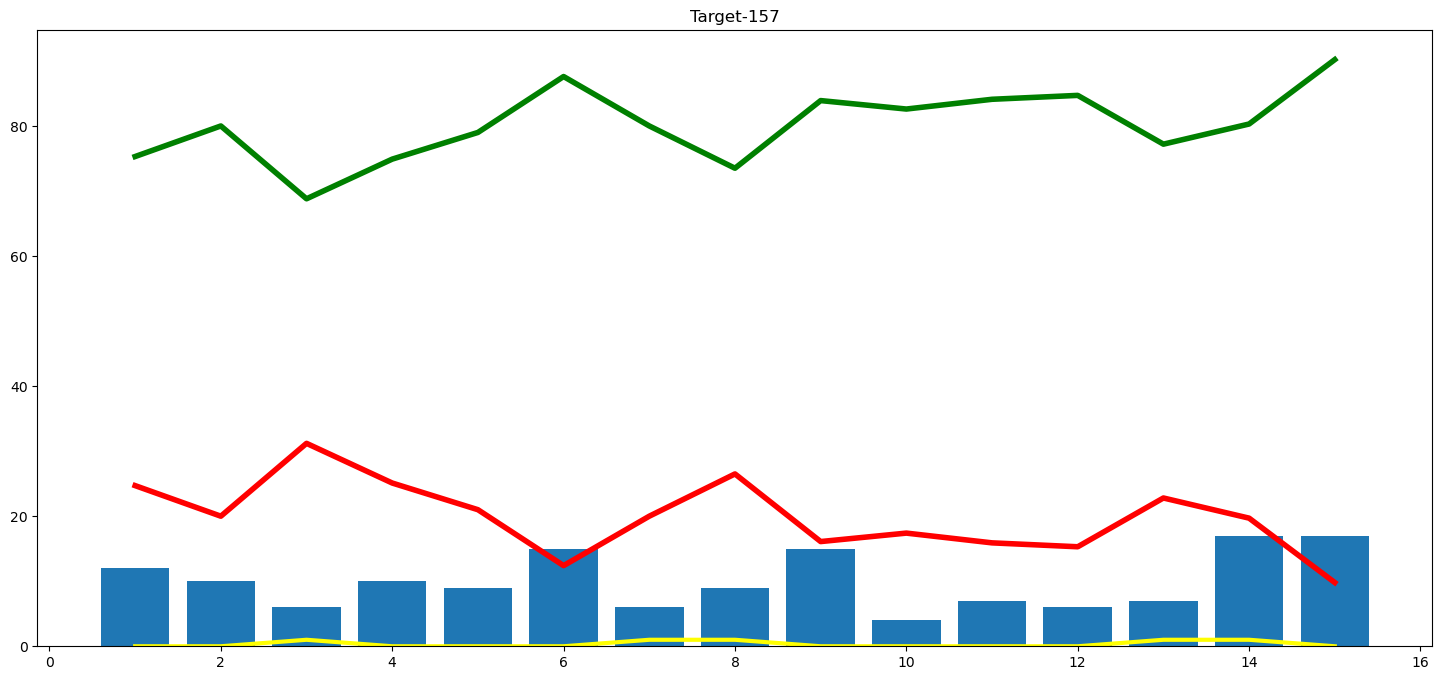

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='green',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-'+str(target))

In [45]:
import joblib
# Serialize and save the model
joblib.dump(pipe, 'pipe.joblib')


['pipe.joblib']

In [1]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
pipe1 = Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])

In [48]:
pipe1.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['BattingTeam', 'BowlingTeam',
                                                   'City'])])),
                ('step2', RandomForestClassifier())])

In [51]:
y_pred1=pipe1.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.9985107967237528

In [53]:
joblib.dump(pipe1, 'pipe1.joblib')

['pipe1.joblib']